In [2]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip

--2023-11-29 20:53:10--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  4.62MB/s    in 1.0s    

2023-11-29 20:53:12 (4.62 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [12]:
import pandas as pd
import zipfile

with zipfile.ZipFile('ml-100k.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# Load the data
u_data = pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
u_user = pd.read_csv("ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])
u_item = pd.read_csv("ml-100k/u.item", sep="|", encoding="latin-1", names=["item_id", "title", "release_date", "IMDB_URL"] + list(range(19)))

# Display the first few rows
print(u_data.head())
print(u_user.head())
print(u_item.head())

# Get basic statistics
print(u_data.describe())
print(u_user.describe())


   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
             item_id        title  release_date  \
1   Toy Story (1995)  01-Jan-1995           NaN   
2   GoldenEye (1995)  01-Jan-1995           NaN   
3  Four Rooms (1995)  01-Jan-1995           NaN   
4  Get Shorty (1995)  01-Jan-1995           NaN   
5     Copycat (1995)  01-Jan-1995           NaN   

                                            IMDB_URL  0  1  2  3  4  5  ...  \
1  http://us.imdb.com/M/title-exact?Toy%20Story%2...  0  0  0  1  1  1  ...   
2  http://us.imdb.com/M/title-exact?G

In [13]:
# Check for missing values
print(u_data.isnull().sum())
print(u_user.isnull().sum())
print(u_item.isnull().sum())

# Check for duplicates
print(u_data.duplicated().sum())
print(u_user.duplicated().sum())
print(u_item.duplicated().sum())


user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64
item_id            0
title              1
release_date    1682
IMDB_URL           3
0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
10                 0
11                 0
12                 0
13                 0
14                 0
15                 0
16                 0
17                 0
18                 0
dtype: int64
0
0
18


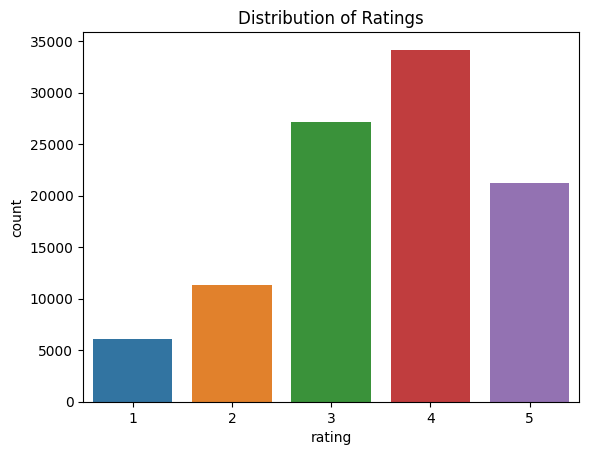

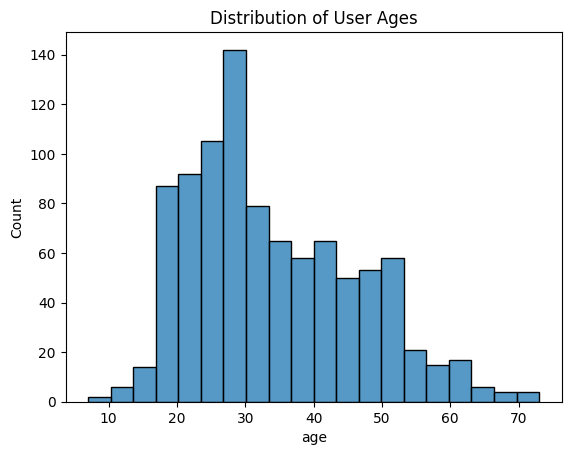

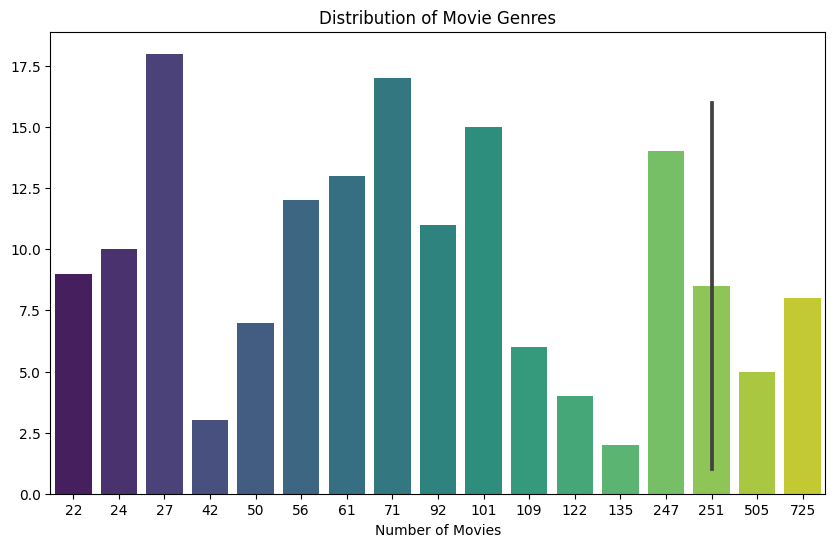

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
sns.countplot(x='rating', data=u_data)
plt.title('Distribution of Ratings')
plt.show()

# Distribution of user ages
sns.histplot(x='age', data=u_user, bins=20)
plt.title('Distribution of User Ages')
plt.show()

# Distribution of movie genres
genre_counts = u_item.iloc[:, 5:].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.show()


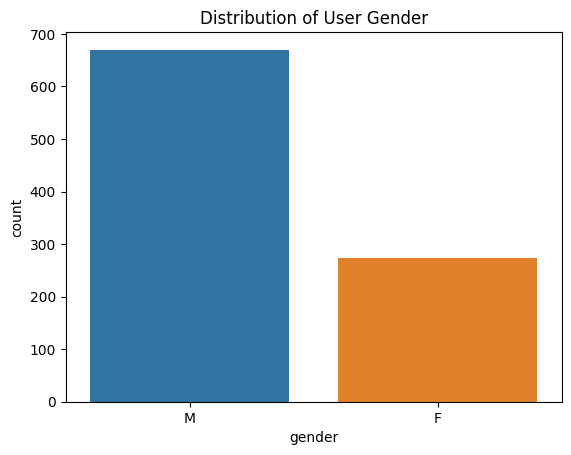

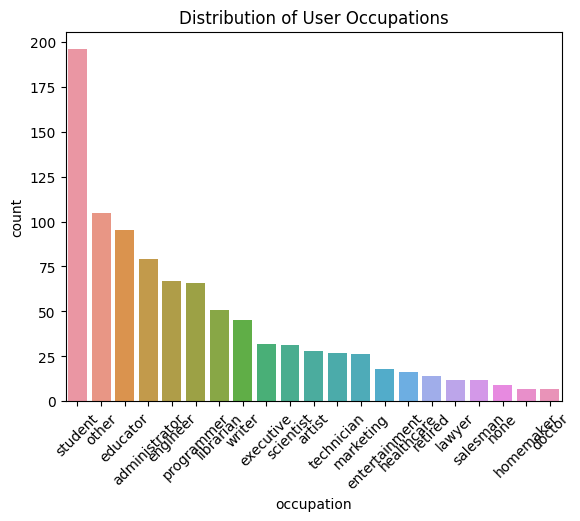

Top 10 Most-Rated Movies:
 50     01-Jan-1977
258    11-Jul-1997
100    14-Feb-1997
181    14-Mar-1997
294    21-Mar-1997
286    15-Nov-1996
288    20-Dec-1996
1      01-Jan-1995
300    01-Jan-1997
121    03-Jul-1996
Name: title, dtype: object
Top 10 Highest-Rated Movies:
 item_id
814     01-Jan-1994
1599    10-May-1996
1201    02-Apr-1996
1122    01-Jan-1939
1653    27-Sep-1996
1293    16-Jan-1998
1500    08-Nov-1996
1189    24-Jan-1997
1536    22-Jul-1996
1467    01-Jan-1993
Name: title, dtype: object


In [15]:
# User demographics analysis
sns.countplot(x='gender', data=u_user)
plt.title('Distribution of User Gender')
plt.show()

sns.countplot(x='occupation', data=u_user, order=u_user['occupation'].value_counts().index)
plt.title('Distribution of User Occupations')
plt.xticks(rotation=45)
plt.show()

# Most-rated movies
most_rated_movies = u_data['item_id'].value_counts().head(10)
print("Top 10 Most-Rated Movies:\n", u_item.loc[most_rated_movies.index, 'title'])

# Highest-rated movies
average_ratings = u_data.groupby('item_id')['rating'].mean()
highest_rated_movies = average_ratings.sort_values(ascending=False).head(10)
print("Top 10 Highest-Rated Movies:\n", u_item.loc[highest_rated_movies.index, 'title'])


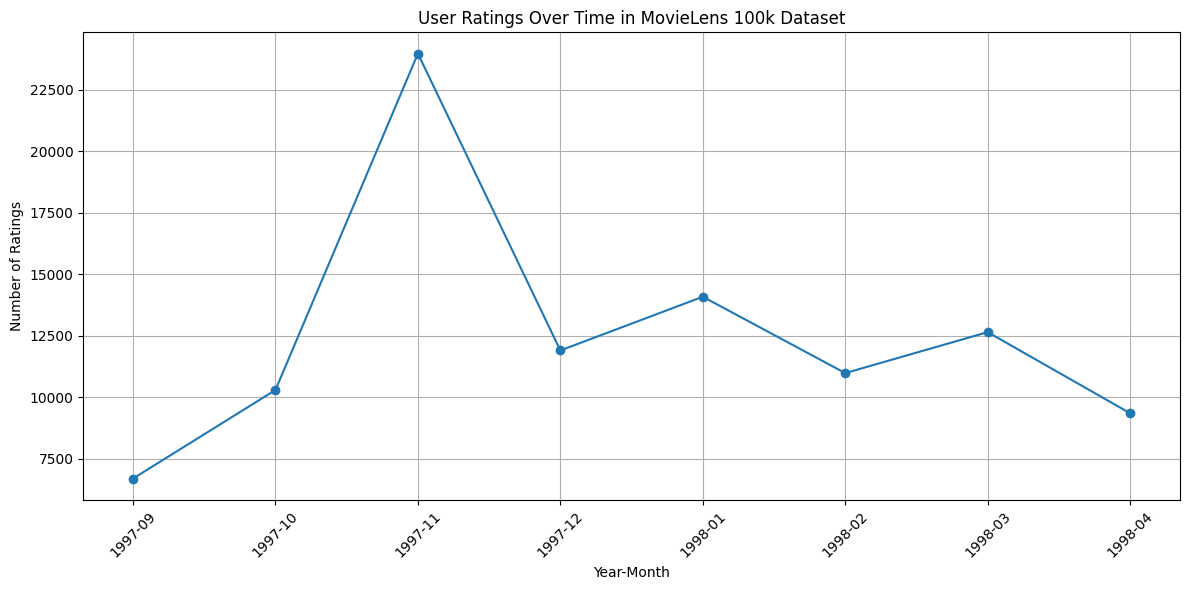

In [16]:
from datetime import datetime

# Convert the timestamp to a datetime object
u_data['timestamp'] = pd.to_datetime(u_data['timestamp'], unit='s')

# Extract the year and month from the timestamp
u_data['YearMonth'] = u_data['timestamp'].dt.to_period('M')

# Get the distribution of ratings over time
time_distribution = u_data['YearMonth'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_distribution.index.astype(str), time_distribution.values, marker='o', linestyle='-')
plt.title('User Ratings Over Time in MovieLens 100k Dataset')
plt.xlabel('Year-Month')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
